## Questions need to be covered in future lab:

### Refresh your memory
- What was the classification accuracy for Knn classifier?
- What's the difference between xor problem and other problems
- What's the target of the learning process? (generalisation)
- How many learning algorithms are there till now?
- How many activiations types have we covered? 
- What're the three problems with the threshold activation? (Fathy's video) (multiclass, target for intermediate layers, nonlinear separability)
- How to decide practically the number of perceptrons? (Fathy covered this geometrically)
- How to maximize the dot product in context of neural networks? (Fathy covered this)
- Multiclass classification vs softmax classification (Fathy covered this)
- Sigmoid importance 
    - (to be able to solve the multiclass problem)
    - (what about binary classification is it still important to use the perceptron?)




### what is needed to be covered next?
- how to decide how many ks that should be used in knn?
- what's train-test-validation.
- what're the learnt weights interpretation 
- regularization 
- baby setting the learning process
- training deep neural networks challenges
- weights initializaiton
- error analysis ()

## Visualizing Activation functions Learning

### Threshold logic unit
<img src="imgs/TLU.png" height="600" width = "600" >
### Perceptron Learning Rule:



<img src="imgs/perceptronlearning.png" height="600" width = "600" >

Note that the error here is calculated as (target - output), it'll be different in the next training algorithm, this will affect the sign of the update rule (+ve in this case)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
x = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0 , 0 , 1]
x = np.array(x)
y = np.array(y).reshape(4,1)
x = np.hstack((x,np.ones((x.shape[0],1))*-1))
print x.shape
print np.ones((x.shape[0],1)).shape
print y
print x

(4L, 3L)
(4L, 1L)
[[0]
 [0]
 [0]
 [1]]
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


accuracy =  100.0 %


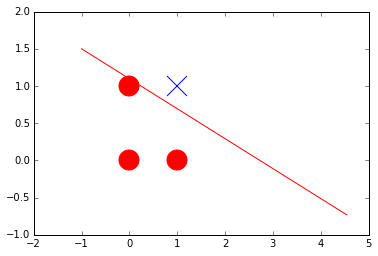

[-1, 4.54488878299922] [1.5, -0.7315546430926593]
accuracy =  100.0 %


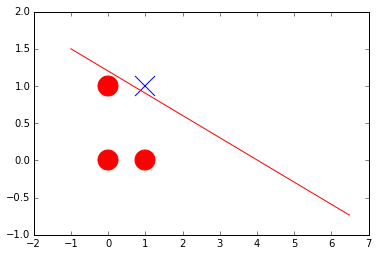

[-1, 6.484847530301278] [1.5, -0.7348277761490647]
accuracy =  100.0 %


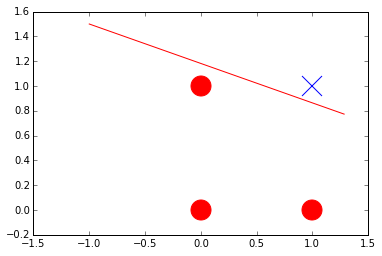

[-1, 1.2838534335001728] [1.5, 0.7733257397319835]
accuracy =  100.0 %


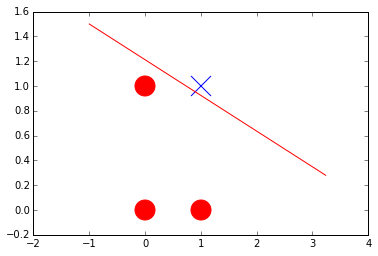

[-1, 3.2364699773985595] [1.5, 0.28029079119673034]


In [17]:
## initialize random weights
for i in xrange(4):
    w_vector = np.random.rand(3,1) * 2 - 1
    step_size = 0.1
    for i in xrange(100):
        for x_sample,target in zip(x,y):
            output = x_sample.dot(w_vector)
            #print "output",output
            if output > 0:
                output = 1
            else:
                output = 0
            error = target - output
            w_vector = w_vector + step_size * error * x_sample.reshape(w_vector.shape[0],1)
        
    ## computing accuracy:
    outputs = x.dot(w_vector)
    outputs[outputs>0] = 1
    outputs[outputs<=0] = 0
    accuracy = (4 - np.sum(np.abs((y-outputs))))/4.0*100
    print "accuracy = ",accuracy,"%"
    z = y[:,0]
    class_0_pts = x[z == 0,:2]
    class_1_pts = x[z == 1,:2]
    plt.figure()
    plt.scatter(class_0_pts[:,0],class_0_pts[:,1],marker='o',color='r',s= 400)
    plt.scatter(class_1_pts[:,0],class_1_pts[:,1],marker='x',color='b',s= 400)
    
    x1_0 = -1 
    x2_0 = float((-w_vector[0]*x1_0 + w_vector[2])/w_vector[1][0])

    x1_1 = 1.5
    x2_1 = float((-w_vector[0]*x1_1 + w_vector[2])/w_vector[1][0])
    plt.plot([x1_0, x2_0], [x1_1, x2_1], c='r')    
    plt.show()
    print [x1_0, x2_0], [x1_1, x2_1]


## Training using gradient descent and sigmoid activation

<img src="imgs/sigmoid.png" height="600" width = "600" >

### Error function

<img src="imgs/cost.png" height="600" width = "600" >

Note that the error here is calculated as (output - target), it'll be different in the next training algorithm, this will affect the sign of the update rule (-ve in this case)

### Training procedure 
<img src="imgs/training.png" height="600" width = "600" >

In [18]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def def_sigmoid(x):
    return sigmoid(x) *(1-sigmoid(x))


(4L, 3L)
(4L, 1L)
[[0]
 [0]
 [0]
 [1]]
accuracy =  100.0 %
[[  7.20838961]
 [  7.20776471]
 [ 11.0991268 ]]
(4L, 1L)


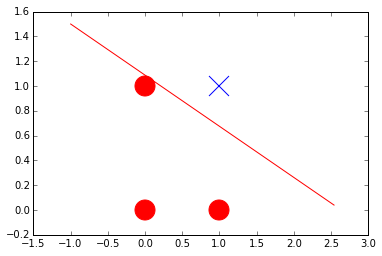

accuracy =  100.0 %
[[  7.22092429]
 [  7.22030238]
 [ 11.11793766]]
(4L, 1L)


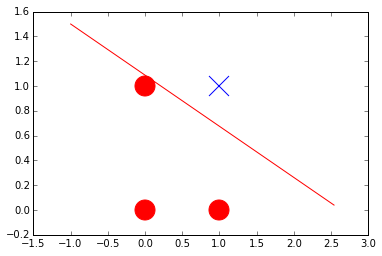

accuracy =  100.0 %
[[  7.21888721]
 [  7.21826421]
 [ 11.11488016]]
(4L, 1L)


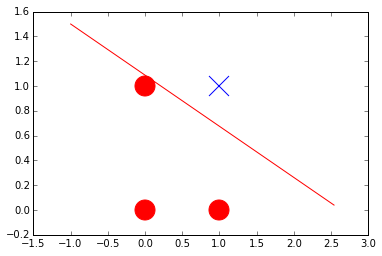

accuracy =  100.0 %
[[  7.20272491]
 [  7.20209674]
 [ 11.0906243 ]]
(4L, 1L)


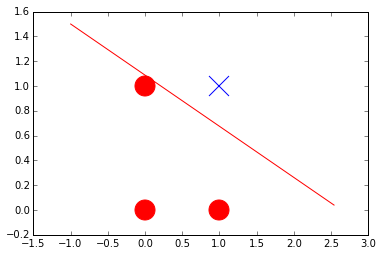

In [47]:
x = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0 , 0 , 1]
x = np.array(x)
y = np.array(y).reshape(4,1)
x = np.hstack((x,np.ones((x.shape[0],1))*-1))
print x.shape
print np.ones((x.shape[0],1)).shape
print y

## initialize random weights
for i in xrange(4):
    w_vector = np.random.rand(3,1) * 2 - 1
    step_size = 0.1
    for i in xrange(10000):
        for x_sample,target in zip(x,y):
            activation = x_sample.dot(w_vector)
            #print "output",output
            ######## different from threshold
            output = sigmoid(activation)
            error = output - target
            w_vector = w_vector  - step_size * error * def_sigmoid(output) * x_sample.reshape(w_vector.shape[0],1)
    ## computing accuracy:
    outputs = x.dot(w_vector)
    outputs[outputs>0.5] = 1
    outputs[outputs<=0.5] = 0
    accuracy = (4 - np.sum(np.abs((y-outputs))))/4.0*100
    print "accuracy = ",accuracy,"%"
    print w_vector
    print y.shape
    z = y[:,0]
    class_0_pts = x[z == 0,:2]
    class_1_pts = x[z == 1,:2]
    plt.figure()
    plt.scatter(class_0_pts[:,0],class_0_pts[:,1],marker='o',color='r',s= 400)
    plt.scatter(class_1_pts[:,0],class_1_pts[:,1],marker='x',color='b',s= 400)
    
    x1_0 = -1 
    x2_0 = float((-w_vector[0]*x1_0 + w_vector[2])/w_vector[1][0])

    x1_1 = 1.5
    x2_1 = float((-w_vector[0]*x1_1 + w_vector[2])/w_vector[1])
    plt.plot([x1_0, x2_0], [x1_1, x2_1], c='r')    
    plt.show()

In [6]:
#### It's obvious that the sigmoid activation tries to find the optimal solution that seperates 

## Extending to a real world multiclass classification problem (MNIST digit recognition)

#### Downloading the data

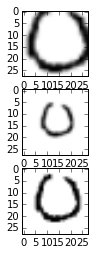

In [41]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn import preprocessing

## this line will download the mnist dataset 54mb to your directory, it might take a while depending on your connection speed.
## if you've downloaded it already, it won't download it again
mnist = fetch_mldata('MNIST original', data_home='./')
X = mnist.data.astype('float64')
y = mnist.target

### randomizing the input samples
### as usually it's not recommended for the network too see many samples of the same class
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

enc = preprocessing.OneHotEncoder()
enc.fit(y.reshape((y.shape[0],1)))
targets = enc.transform(y.reshape((y.shape[0],1))).toarray()
X_train, X_test, y_train, y_test = train_test_split(
    X, targets, train_size=30000, test_size=20000)
X_test_zoom_in  = zoom_in(X_test,input_has_bias_row=False)
X_test_zoom_out = zoom_out(X_test,input_has_bias_row=False)
plt.subplot(3, 1, 1)
plt.imshow(X_test_zoom_in[4,:].reshape((28,28)),cmap= 'Greys')
plt.subplot(3, 1, 2)
plt.imshow(X_test_zoom_out[4,:].reshape((28,28)),cmap= 'Greys')
plt.subplot(3, 1, 3)
plt.imshow(X_test[4,:].reshape((28,28)),cmap= 'Greys')



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_zoom_in= scaler.transform(X_test_zoom_in)
X_test_zoom_out= scaler.transform(X_test_zoom_out)

X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))*1))
X_test = np.hstack((X_test,np.ones((X_test.shape[0],1))*1))
X_test_zoom_in = np.hstack((X_test_zoom_in,np.ones((X_test_zoom_in.shape[0],1))*1))
X_test_zoom_out = np.hstack((X_test_zoom_out,np.ones((X_test_zoom_out.shape[0],1))*1))

features_count = X_train.shape[1]
outputs_count = y_train.shape[1]

(70000L, 784L)


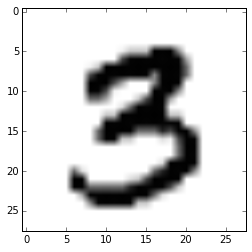

In [42]:
## showing a single image
print mnist.data.shape
random_index = np.random.randint(70000)
random_image = mnist.data[random_index].reshape((28,28))
plt.imshow(random_image,cmap= 'Greys')

In [43]:
print X_train.shape

(30000L, 785L)


### Converting digits targets encoding to one hot encoding
<img src="imgs/one-hot.png" height="600" width = "600" >

As we'll be dealing with multiple sigmoid output units, and for each unit we'll need a target to optimize using SGD (Stochastic Gradient Descent), that's why we need one hot encoding

### We'll be training the following neural network

- The image gets flattened to be a long vector of 784 values.
- Each pixel is connected to 10 different outputs, each output is a sigmoid activation function that (after learning is done) represents a plane that tries to separate a digit samples from the other digits' samples.
<img src="imgs/mnist.png" height="800" width = "800" >


In [44]:
## initialize random weights
reg = 0.1
for i in xrange(1):
    w_matrix = np.random.rand(features_count,outputs_count) * 0.2 - 0.1
    print w_matrix.shape
    step_size = 0.01
    for i in xrange(100):
        for x_sample,target in zip(X_train,y_train):
            #print target
            activation = x_sample.dot(w_matrix)
            output = sigmoid(activation).reshape(activation.shape[0],1)
            error = output - target.reshape(target.shape[0],1)
            #w_matrix = w_matrix - step_size * x_sample.reshape(w_matrix.shape[0],1).dot( (error.T))#def_sigmoid(output)).T)
            w_matrix = (1-2*step_size*reg)*w_matrix - step_size * x_sample.reshape(w_matrix.shape[0],1).dot( (error * def_sigmoid(output)).T)
            #w_matrix = w_matrix - step_size * x_sample.reshape(w_matrix.shape[0],1).dot( (error * def_sigmoid(output)).T)
        if i % 5 == 0:
            outputs = X_train.dot(w_matrix)
            outputs_label = np.argmax(outputs,axis=1)
            outputs_gt    = np.argmax(y_train,axis=1) ## groundtruth
            accuracy = (np.sum(outputs_label == outputs_gt) *1.0)/ outputs_label.shape[0]
            print "epoch",i,": training accuracy = ",accuracy,"%"
        if i % 30 == 0:
            step_size = step_size * 0.1
    ## computing accuracy on test data:
    outputs = X_test.dot(w_matrix)
    
    outputs_label = np.argmax(outputs,axis=1)
    outputs_gt    = np.argmax(y_test,axis=1) ## groundtruth
    
    accuracy = (np.sum(outputs_label == outputs_gt) *1.0)/ outputs_label.shape[0]
    print "test accuracy = ",accuracy,"%"


(785L, 10L)
epoch 0 : training accuracy =  0.792633333333 %
epoch 5 : training accuracy =  0.8329 %
epoch 10 : training accuracy =  0.8329 %
epoch 15 : training accuracy =  0.8329 %
epoch 20 : training accuracy =  0.8329 %
epoch 25 : training accuracy =  0.8329 %
epoch 30 : training accuracy =  0.8329 %
epoch 35 : training accuracy =  0.8344 %
epoch 40 : training accuracy =  0.8344 %
epoch 45 : training accuracy =  0.834366666667 %
epoch 50 : training accuracy =  0.834366666667 %
epoch 55 : training accuracy =  0.834366666667 %
epoch 60 : training accuracy =  0.834366666667 %
epoch 65 : training accuracy =  0.8337 %
epoch 70 : training accuracy =  0.833866666667 %
epoch 75 : training accuracy =  0.833666666667 %
epoch 80 : training accuracy =  0.833533333333 %
epoch 85 : training accuracy =  0.8335 %
epoch 90 : training accuracy =  0.8335 %
epoch 95 : training accuracy =  0.8335 %
test accuracy =  0.8292 %


### Visualizing weights after training

Let’s focus on just the connections plugged into the first output neuron, which we will label "Z", and label each of the input neurons and their corresponding weights as xi and wi.
<img src="imgs/weights_vis.png" height="800" width = "800" >

### The zero weight vector visualized
<img src="imgs/zero.png" height="800" width = "800" >

### Different Weights visualized after "Good" training
<img src="imgs/weights_vis2.png" height="800" width = "800" >

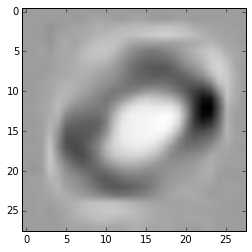

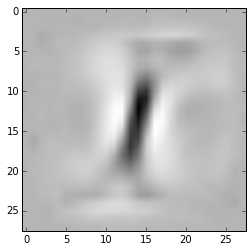

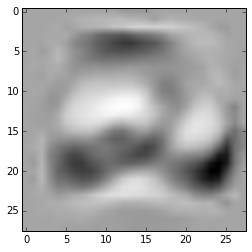

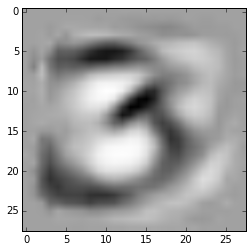

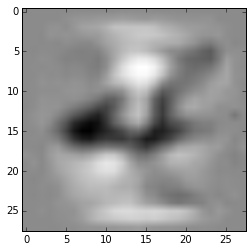

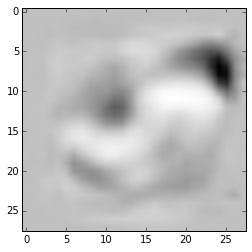

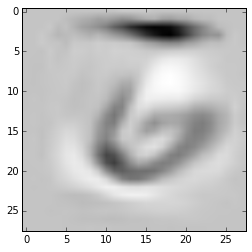

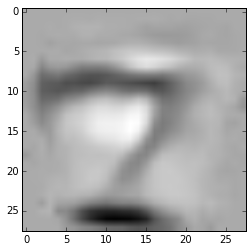

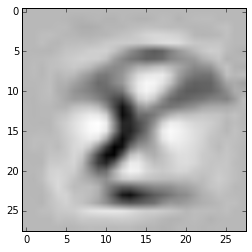

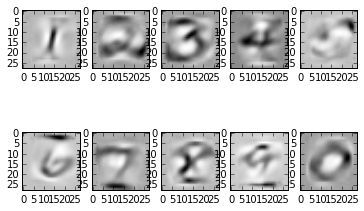

In [45]:
#print w_matrix.min(),w_matrix.max()
## ignoring the bias term
weights_wobias = w_matrix[:-1,:]
#print weights_wobias.shape

for i in xrange(w_matrix.shape[1]):
    row = i/2
    col = i%5
    weight_img = weights_wobias[:,i].reshape((28,28))
    #print weight_img.max(),weight_img.min()
    weight_img -= np.min(weight_img)
    weight_img = weight_img/np.max(weight_img)*255.0
    plt.figure()
    plt.imshow(weight_img,cmap= 'Greys')
    
for i in xrange(w_matrix.shape[1]):
    row = i/2
    col = i%5
    weight_img = weights_wobias[:,i].reshape((28,28))
    weight_img -= np.min(weight_img)
    weight_img /= np.max(weight_img)*255.0
    plt.subplot(2, 5, i)
    plt.imshow(weight_img,cmap= 'Greys')

## Why doesn't our training yield clear weights visualizations?

### As a good training process involves the following
- Using regularization to prevent weights explosion.
- Trying different learning rates.
- (in future networks) using validation set for hyperparameter selection (learning rate, number of hidden units, and mini-batch size)
- We're updating the weights per sample image which is a little bit noisy (Stochastic Gradient Descent), mini-batch would be better.
- We're updating the weights using just the gradient, which isn't the optimal way for updating the weights (as we'll see later in the course)
- Also as there isn't a global minimum similar to the AND problem, but the error space looks like the following function
<img src="imgs/learninghard.png" height="400" width = "400" >
So we might end up in a local minimum as different random initialization would end to a different optimal error function
<img src="imgs/multiplelearning.png" height="600" width = "600" >

it turns out that this is not a major problem in deep learning, because when there are enough hidden units alongside some other criteria, most local minima are “good enough,” being reasonably close to the absolute minimum. According to Dauphin et al, a bigger challenge than local minima are saddle points, along which the gradient becomes very close to 0. For an explanation of why this is true, see this lecture by Yoshua Bengio
http://videolectures.net/deeplearning2015_bengio_theoretical_motivations/

### Saving the weights after training

In [65]:
import pickle as pkl
with open('weights.pkl', 'wb') as output:
    pkl.dump(w_matrix, output)

## Limitations of the linear classifier:

1. It captures all the different samples in a single template, it's very hard to be able to capture all the variability in a given class in one template.
2. It's limited by the spatial locations of the features (so it learns to expect the one or the zero, in a certain position with a certain orientation .. etc).
3. It doesn't have the capacity to learn complex features.


#### It's important to note that usually linear classifier used in the previous context make semantically acceptable mistakes (9 could be classified as 4)


#### We'll be altering the test data with some variations (zoom in, shifting, zoom out) and see their effect on test accuracy

### Helper Functions

In [8]:
import cv2
from scipy import misc

def zoom_in(imgs,input_has_bias_row = True, offset = 4):
    if input_has_bias_row:
        result = imgs[:-1,:].copy()
    else:
        result = imgs.copy()
    im_shape = (28,28)
    for idx,img in enumerate(imgs):
        img = result[idx,:]
        img = img.reshape(im_shape)
        img = img[offset:-offset,offset:-offset]
        img = misc.imresize(img,im_shape)
        result[idx,:] = img.reshape((1,28*28))
    return result
        
def zoom_out(imgs,input_has_bias_row = True, offset = 4):
    if input_has_bias_row:
        result = imgs[:-1,:].copy()
    else:
        result = imgs.copy()
    im_shape = (28,28)
    for idx,img in enumerate(imgs):
        img = result[idx,:]
        img = img.reshape(im_shape)
        img = misc.imresize(img,(28-2*offset,28-2*offset))
        temp = np.zeros(im_shape)
        temp[offset:-offset,offset:-offset] = img
        img = temp.copy()
        
        result[idx,:] = img.reshape((1,28*28))
        
    return result


def model_accuracy(X_test,w_matrix,y_test):
    outputs = X_test.dot(w_matrix)

    outputs_label = np.argmax(outputs,axis=1)
    outputs_gt    = np.argmax(y_test,axis=1) ## groundtruth

    accuracy = (np.sum(outputs_label == outputs_gt) *1.0)/ outputs_label.shape[0]
    return accuracy

    

In [14]:
import pickle as pkl
with open('weights.pkl', 'rb') as openfile:
    weights = pkl.load(openfile)

outputs = X_test.dot(w_matrix)

outputs_label = np.argmax(outputs,axis=1)
outputs_gt    = np.argmax(y_test,axis=1) ## groundtruth

accuracy = (np.sum(outputs_label == outputs_gt) *1.0)/ outputs_label.shape[0]
print "normal accuracy = "     ,model_accuracy(X_test ,weights,y_test),"%"
print "zoomed in accuracy = "  ,model_accuracy(X_test_zoom_in,weights,y_test),"%"
print "zoomed out accuracy = " ,model_accuracy(X_test_zoom_out,weights,y_test),"%"


normal accuracy =  0.73365 %
zoomed in accuracy =  0.1285 %
zoomed out accuracy =  0.2897 %


### Moving to non-linear classifier (Multilayer Networks)
<img src="imgs/nonlinear.png" height="800" width = "800" >


### Non-linear features interpretation
<img src="imgs/nonlinear2.png" height="800" width = "800" >

In single-layer and multi-layer neural networks, each layer has a similar function; it transforms data from the previous layer into a “higher-level” representation of that data. By “higher-level,” we mean that it contains a compact and more salient representation of that data, in the way that a summary is a “high-level” representation of a book. For example, in the 2-layer network above, we mapped the “low-level” pixels into “higher-level” features found in digits (strokes, loops, etc) in the first layer, and then mapped those high-level features into an even higher-level representation in the next layer, that of the actual digits. This notion of transforming data into smaller but more meaningful information is at the heart of machine learning, and a primary capability of neural networks.

By adding a hidden layer into a neural network, we give it a chance to learn features at multiple levels of abstraction. This gives us a rich representation of the data, in which we have low-level features in the early layers, and high-level features in the later layers which are composed of the previous layers’ features.

In [27]:
## initialize random weights
reg = 0.1

for i in xrange(1):
    w_matrix = np.random.rand(features_count,outputs_count) * 0.2 - 0.1
    print w_matrix.shape
    step_size = 0.01
    for i in xrange(100):
        for x_sample,target in zip(X_train,y_train):
            #print target
            activation = x_sample.dot(w_matrix)
            output = (np.exp(activation)/np.sum(np.exp(activation))).reshape(output.shape[0],1)
            error = output - target.reshape(target.shape[0],1)
            w_matrix = w_matrix - step_size * x_sample.reshape(w_matrix.shape[0],1).dot( (error.T))#def_sigmoid(output)).T)
            #w_matrix = (1-2*step_size*reg)*w_matrix - step_size * x_sample.reshape(w_matrix.shape[0],1).dot( (error * def_sigmoid(output)).T)
            #w_matrix = w_matrix - step_size * x_sample.reshape(w_matrix.shape[0],1).dot( (error * def_sigmoid(output)).T)
        if i % 49 == 0:
            print i
    ## computing accuracy:
    outputs = X_test.dot(w_matrix)
    
    outputs_label = np.argmax(outputs,axis=1)
    outputs_gt    = np.argmax(y_test,axis=1) ## groundtruth
    
    accuracy = (np.sum(outputs_label == outputs_gt) *1.0)/ outputs_label.shape[0]
    print "accuracy = ",accuracy,"%"


(785L, 10L)
0
49
98
accuracy =  0.0973 %


c:\python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp
c:\python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in divide
